In [16]:
import sys
print(sys.version)

3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]


# Tests

### Library for running tests

In [17]:
#Imports
import nbimporter
from importlib import reload

In [18]:
#Dependencies
import HelperFunctions as hf
import Visualizer as vz

## Import Tests

In [19]:
def base_test():
    """Runs test for loading of dependencies, and the device for trainig!"""
    try:
        help(hf.tellALie)
        print("output of hf.tellALie():")
        hf.tellALie()
        print("output of hf.get_device():")
        device = hf.get_device()
    except:
      print("--ACCESS TO HelperFunctions.ipynb NOT FUNCTIONAL!--")
    else:
        print("\nAccess to HelperFunctions.ipynb functional!")

In [20]:
#Test import functionality
base_test()

Help on function tellALie in module HelperFunctions:

tellALie()
    Test if the helperFunctions.ipynb or hf library has loaded successfully, but still lies to you!

output of hf.tellALie():
You have all the time in the world!
Your helperfunctions library has been loaded!
output of hf.get_device():
Using cpu device

Access to HelperFunctions.ipynb functional!


## Modelmanager Tests

In [21]:
def test_models():
    """
    Base model tests! Tests every model that is used in this project and with every used lossfuncitons and optimizers . 
    Does not need any parameters.
    Then stores the last model, loads it and finally deletes the test file.
    
    
    """
    CMM =  hf.model_manager( model_class = "NeuralNetwork", 
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},)
    
    CMM = hf.model_manager( model_class = "ShapeBasedNeuralNetwork", 
                     loss_function_name = "MSELoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},)
    
    CMM = hf.model_manager( model_class = "CONVNet", 
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "Adam",
                     optimizer_params = {"lr": 0.001},)
    
    CMM = hf.model_manager( model_class = "SimpleAutoencoder", 
                     loss_function_name = "MSELoss",
                     optimizer_name = "Adam",
                     optimizer_params = {"lr": 0.001},)
    
    autoMM = hf.model_manager( model_class = "SimpleAutoencoder", 
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},)
    
    classifierMM = hf.model_manager( model_class = "ClassifierOfEncodedData", 
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},
                     model_parameters = {"encoder": autoMM.model.encoder}     )
    
    CMM = hf.model_manager( model_class = "VisualTransformer", 
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},)
    
    CMM = hf.model_manager( model_class = "AltVisualTransformer", 
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},)
    
    CMM = hf.model_manager( model_class = "ShapeVisualTransformer",
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},)
    
    CMM = hf.model_manager( model_class = "ShapeTransformer",
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},)

    hf.save_model_manager(CMM, "Test")
    CMM = hf.load_model_manager("ShapeTransformerTest.pth")
    hf.remove_file( "models\\ShapeTransformerTest.pth") # only used to remove test files.

    print("\n All models loaded without errors")

In [22]:
test_models()

Using cpu device
parameters stored
model type initialized: NeuralNetwork  
Optimizer: SGD
loss function: CrossEntropyLoss
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): ReLU()
    (10): Linear(in_features=128, out_features=10, bias=True)
  )
)
Using cpu device
parameters stored
model type initialized: ShapeBasedNeuralNetwork  
Optimizer: SGD
loss function: MSELoss
ShapeBasedNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=512, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
 

## Tests with dataset

In [23]:
def tests_data():
    """ 
    Tests functions related to the dataset
    """
    #Test loading data
    raw_train = hf.get_raw_MNIST_train_data()
    raw_test  = hf.get_raw_MNIST_test_data()

    #Transform 

    #Standard data is normalized, given 
    standard_train = hf.get_MNIST_train_data(hf.get_standard_MNIST_training_transform())
    standard_test  = hf.get_MNIST_test_data(hf.get_standard_MNIST_test_transform())

    #Test DataLoader:
    standard_train_loader = hf.set_dataloader(standard_train , hf.standard_batch_size_64())
    standard_test_loader = hf.set_dataloader(standard_test, hf.standard_batch_size_64(), shuffle= False)

    
    #Assertions on the data:
    # Validate training set
    train_data, train_labels = next(iter( standard_train_loader))
    assert train_data.shape == (hf.standard_batch_size_64(), 1, 28, 28), \
        f"Train images shape mismatch. Expected (B,1,28,28), got {train_data.shape}"
    assert train_labels.shape == (hf.standard_batch_size_64(),), \
        f"Train labels shape mismatch. Expected (B,), got {train_labels.shape}"
    assert len(standard_train) == 60000, \
        f"Train set length mismatch. Expected 60000, got {len(train_set)}"
    
    # Validate test set
    test_data, test_labels = next(iter(standard_test_loader))
    assert test_data.shape == (hf.standard_batch_size_64(), 1, 28, 28), \
        f"Test images shape mismatch. Expected (B,1,28,28), got {test_data.shape}"
    assert test_labels.shape == (hf.standard_batch_size_64(),), \
        f"Test labels shape mismatch. Expected (B,), got {test_labels.shape}"
    assert len(standard_test) == 10000, \
        f"Test set length mismatch. Expected 10000, got {len(test_set)}"
    
    print("All shape and length assertions passed successfully for the standard training data!\n")

    print("printing random image from standard dataset: ")
    print(hf.getRandomNumber(60000))
    hf.display_image(standard_train[hf.getRandomNumber(60000)])
    hf.display_image(standard_test[hf.getRandomNumber(10000)])
     
    #Test tranaforming data
    
    img_train, _ = raw_train[0]
    img_test, _ = raw_test[0]
    features_train =  hf.extract_contrast_features(img_train, hf.CONTRAST_THRESHOLD())  
    features_test =   hf.extract_contrast_features(img_test, hf.CONTRAST_THRESHOLD())  

    
    print("Train features shape: ",features_train.shape)
    print("Test features shape: ", features_test.shape)

    reconstructed_train = hf.features_to_image(features_train)
    reconstructed_test =  hf.features_to_image(features_test)

    hf.compare_images( img_train ,reconstructed_train, " Train"  )
    hf.compare_images( img_test ,reconstructed_test, " Test"  )
  

All shape and length assertions passed successfully for the standard training data!

printing random image from standard dataset: 
10481


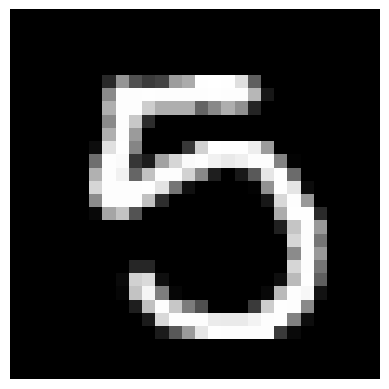

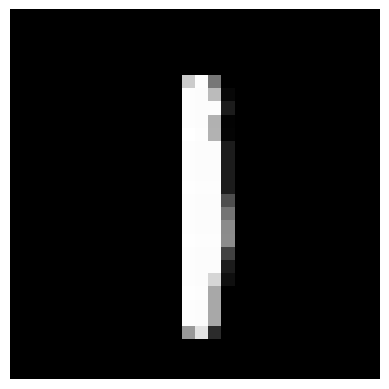

Train features shape:  torch.Size([238, 3])
Test features shape:  torch.Size([193, 3])


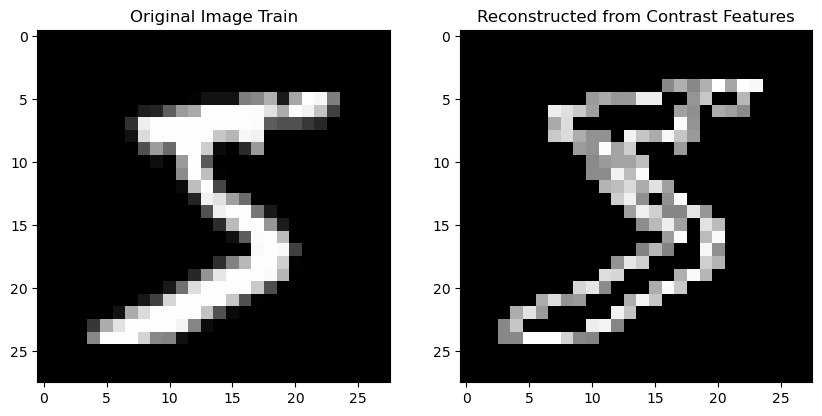

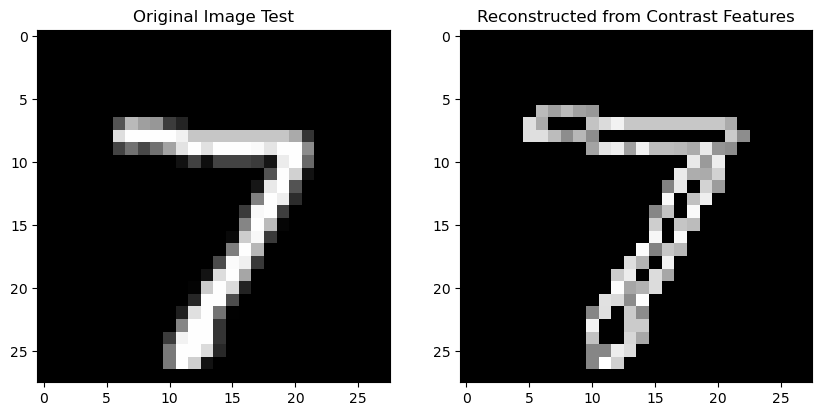

In [24]:
tests_data()

## Training Tests

In [25]:
def training_tests(test_shape_Transformer = False):

    
    #Initializing stuff to get the model started
    CMM = hf.model_manager( model_class = "CONVNet", 
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "Adam",
                     optimizer_params = {"lr": 0.001},)

    NMM =  hf.model_manager( model_class = "NeuralNetwork", 
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "Adam",
                     optimizer_params = {"lr": 0.001},)
    
    #Get and ready data:
    standard_train = hf.get_MNIST_train_data(hf.get_standard_MNIST_training_transform())
    standard_test  = hf.get_MNIST_test_data(hf.get_standard_MNIST_test_transform())
    standard_train_loader = hf.set_dataloader(standard_train , hf.standard_batch_size_64())
    standard_test_loader = hf.set_dataloader(standard_test, hf.standard_batch_size_64(), shuffle= False)

    #Getting data for auteoncoder
    # train_data = hf.get_MNIST_train_data(hf.get_standard_MNIST_autoencoder_training_transform())
    # test_data = hf.get_MNIST_test_data(hf.get_standard_MNIST_autoencoder_test_transform())

    
    #Train
    epochs = 1
    stats = CMM.initiate_training( epochs,  standard_train_loader, standard_test_loader)
    stats = NMM.initiate_training( epochs,  standard_train_loader, standard_test_loader)

    assert len(stats) == NMM.num_epochs, \
        f"Test images shape mismatch. Expected {len(stats)}, got {NMM.num_epochs}"
    
    if (test_shape_Transformer):
        #load model
        CMM = hf.model_manager( model_class = "ShapeTransformer",
                     loss_function_name = "CrossEntropyLoss",
                     optimizer_name = "SGD",
                     optimizer_params = {"lr": 0.001},)        
        # get data
        raw_train = hf.get_raw_MNIST_train_data()
        raw_test  = hf.get_raw_MNIST_test_data()
        # Convert entire dataset
        converted_MNIST_train = hf.convert_and_optimize_dataset(raw_train , optimize=False) 
        converted_MNIST_test =  hf.convert_and_optimize_dataset(raw_test ,  optimize=False) 

        train_dataloader = hf.set_dataloader( converted_MNIST_train , hf.standard_batch_size_64() , collate_fn = hf.collate_fn_padded)
        test_dataloader = hf.set_dataloader(converted_MNIST_test , hf.standard_batch_size_64()  , shuffle = False, collate_fn = hf.collate_fn_padded)
        

        stats = CMM.initiate_training( epochs, train_dataloader, test_dataloader)


In [26]:
training_tests(True)

Using cpu device
parameters stored
model type initialized: CONVNet  
Optimizer: Adam
loss function: CrossEntropyLoss
CONVNet(
  (relu): ReLU()
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Using cpu device
parameters stored
model type initialized: NeuralNetwork  
Optimizer: Adam
loss function: CrossEntropyLoss
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear

<IPython.core.display.Javascript object>

Epoch count 1
----------------------------------
loss: 2.283102  [   64/60000]
loss: 0.579760  [ 6464/60000]
loss: 0.372525  [12864/60000]
loss: 0.310844  [19264/60000]
loss: 0.300970  [25664/60000]
loss: 0.191755  [32064/60000]
loss: 0.222034  [38464/60000]
loss: 0.189137  [44864/60000]
loss: 0.125926  [51264/60000]
loss: 0.200794  [57664/60000]
Execution time of epoch: 20.45 seconds
Test Error of epoch 1: 
 Accuracy: 96.0%, Avg loss: 0.134375 

Done!


<IPython.core.display.Javascript object>

Using cpu device
parameters stored
model type initialized: ShapeTransformer  
Optimizer: SGD
loss function: CrossEntropyLoss
ShapeTransformer(
  (input_proj): Linear(in_features=3, out_features=128, bias=True)
  (encoder_blocks): ModuleList(
    (0-3): 4 x ShapeTransformerEncoderBlock(
      (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
      )
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=64, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=64, out_features=128, bias=True)
      )
    )
  )
  (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=128, out_features=10, bias=True)
)
Epoch count 1
----------------------------------
loss: 2.355066  [   64/60000]
loss: 2.249011  [

<IPython.core.display.Javascript object>

## Tests with visualization

In [27]:
#code for reimporting a funciton after change in data
import HelperFunctions
reload(HelperFunctions)
import HelperFunctions as hf
from HelperFunctions import tellALie
tellALie()

You have all the time in the world!
Your helperfunctions library has been loaded!


In [28]:
import Visualizer
reload(Visualizer)
import Visualizer as vz

In [29]:
def test_visuals():

    #load in the visualizer
    visualizer = vz.MNISTStatsVisualizer()
    #Load in the dataset
    visualizer.load_mnist_test_data("mnist_default")


    #load data to visualizer
    visualizer.add_stats("SimpleShapeNeuralNetwork", hf.load_JSON_stats("SimpleShapeNeuralNetwork_090220252.json"), stats_type=1)
    visualizer.add_stats("BasicNeuralNetwork", hf.load_stats("NeuralNetwork002.pth"), stats_type=1)
    visualizer.add_stats("SimpleAutoencoder", hf.load_stats("SimpleAutoencoder001.pth"), stats_type=2)
    visualizer.add_stats("ClassifierOfEncodedData", hf.load_stats("ClassifierOfEncodedData001.pth"), stats_type=1)
    visualizer.add_stats("CONVNet", hf.load_stats("CONVNet001.pth"), stats_type=1)
    visualizer.add_stats("OldTransformer", hf.load_stats("VisualTransformerSevenPatchSize001.pth"), stats_type=1)
    visualizer.add_stats("VisualTransformer", hf.load_stats("VisualTransformer001.pth"), stats_type=1)

    
    visualizer.plot_mistake_matrix("OldTransformer")

    visualizer.plot_double_histogram([ "SimpleShapeNeuralNetwork" , "BasicNeuralNetwork"])

    visualizer.plot_accuracy(["SimpleShapeNeuralNetwork", "BasicNeuralNetwork", "ClassifierOfEncodedData","CONVNet"])

    visualizer.plot_loss(["OldTransformer", "VisualTransformer", "ClassifierOfEncodedData" , "CONVNet"])

    visualizer.show_failed_predictions("CONVNet", max_images=1000)

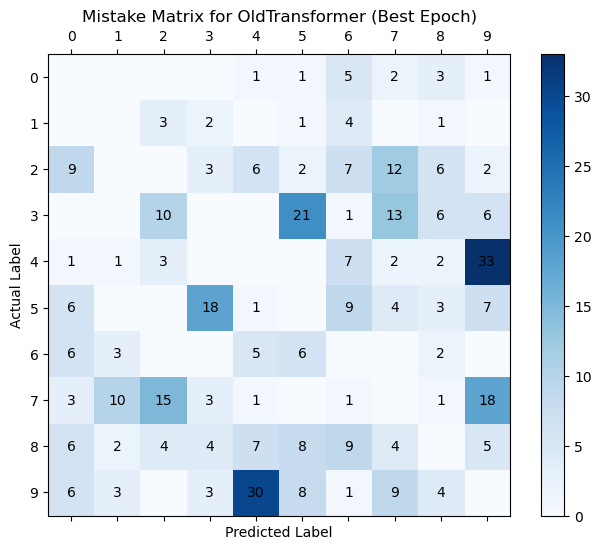

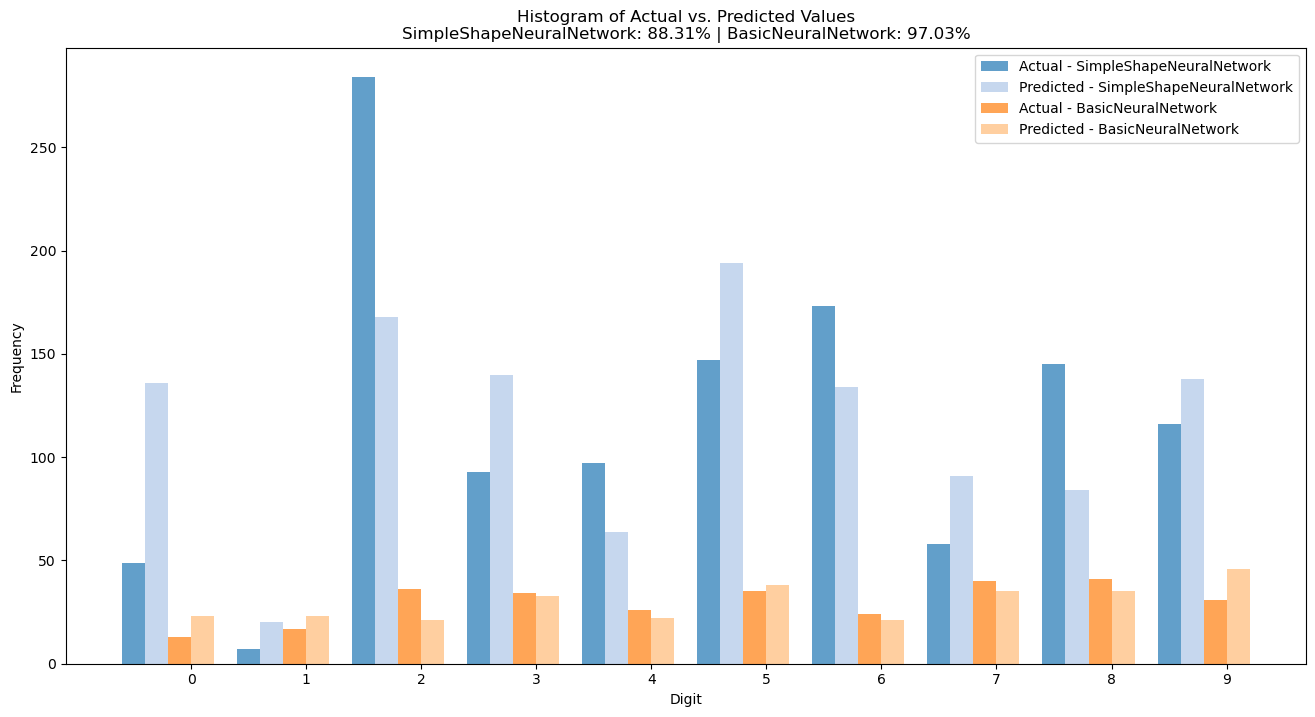

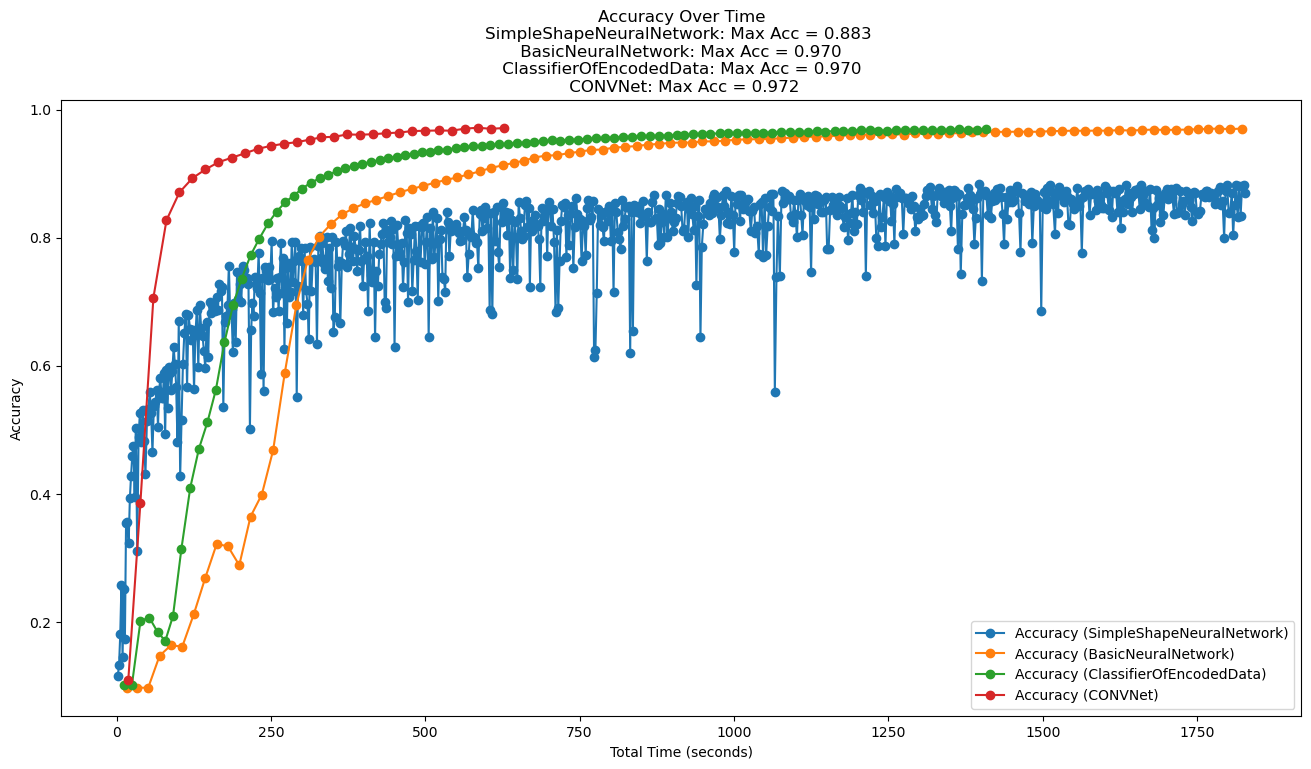

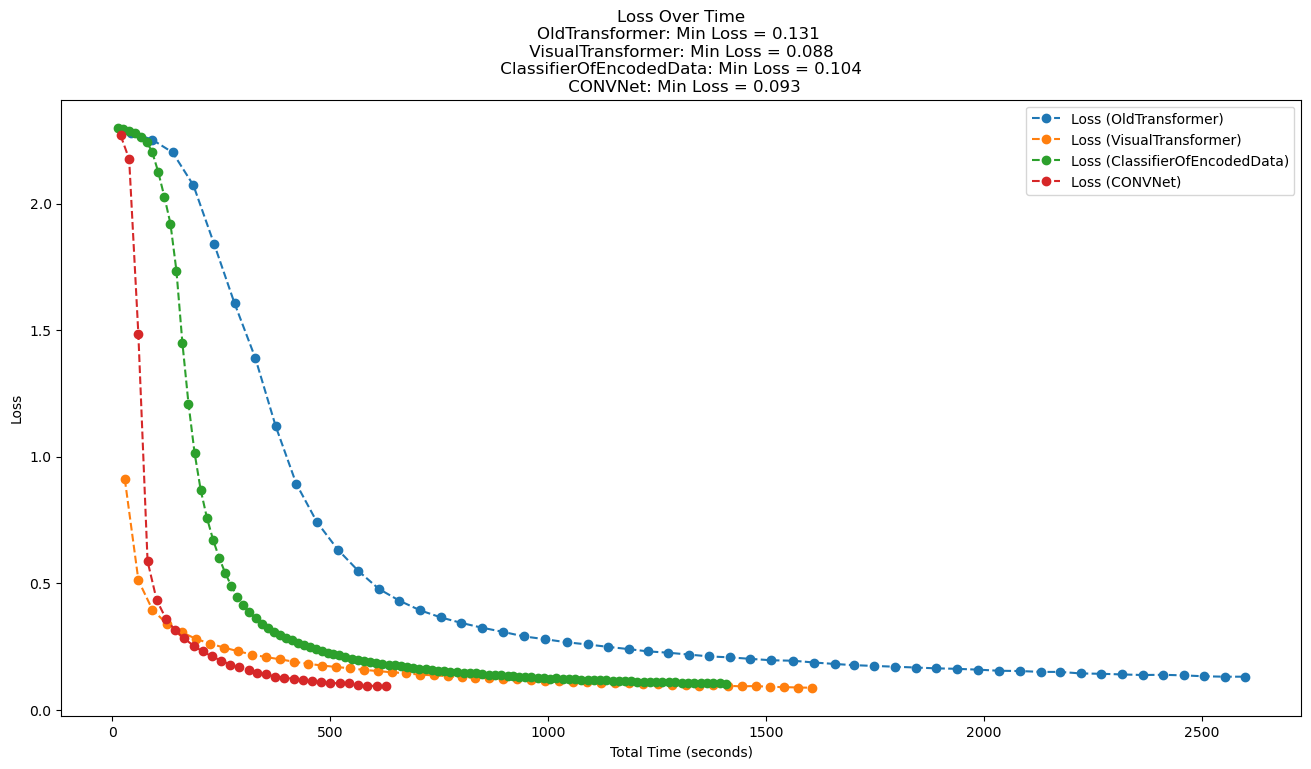

In [30]:
test_visuals()